<a href="https://colab.research.google.com/github/danielfarrellwork/NYC-Bridge-Structures/blob/main/FWHABridgeInvetory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FHWA Bridge Inventory data
*Created by* [Bulent Karakus](https://www.linkedin.com/in/bkarakus/)

Visualize National Bridge Inventory data.

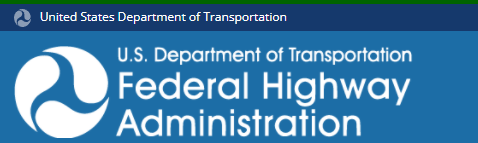

# Step 1: Setting up the environment

In [ ]:
!pip install geopandas

# Step 2: Load and prepare the data


In [ ]:
import geopandas as gpd
import folium
import pandas as pd

def CreateURLs(State,Year):
  str1='https://www.fhwa.dot.gov/bridge/nbi/'+Year+'/delimited/'+State+Year[2:]+'.txt'
  return str1
  
def Rating(a,Arr,p='eq'):  
    if p=='eq':
        filt_list=Arr[(Arr["LOWEST_RATING"]==a) ]
    elif p=='gr':
        filt_list=Arr[(Arr["LOWEST_RATING"]>a) ] 
    elif p=='ls':
        filt_list=Arr[(Arr["LOWEST_RATING"]<a) ]  
    filt_list.reset_index(drop=True)
    make_geodf(filt_list)
    return filt_list

def States(a,Arr):    
    filt_list=Arr[(Arr['ST']==a) ]
    filt_list.reset_index(drop=True)
    make_geodf(filt_list)
    return filt_list

def make_geodf(df):
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LAT_016'], df['LONG_017']))
    return gdf

def fYear(a,Arr,p='eq'):  
    if p=='eq':
        filt_list=Arr[(Arr["YEAR_BUILT_027"]==a) ]
    elif p=='gr':
        filt_list=Arr[(Arr["YEAR_BUILT_027"]>a) ] 
    elif p=='ls':
        filt_list=Arr[(Arr["YEAR_BUILT_027"]<a) ]      
    filt_list.reset_index(drop=True)
    make_geodf(filt_list)
    return filt_list
       
def mask(df):
    filt_list=df[(df['LAT_016']>25) & (df['LAT_016']<72) & (df['LONG_017']>-160) & (df['LONG_017']<-66)]
    return filt_list

def fmap(Arr):
    map=folium.Map(location=[40,-76],zoom_start=7)
    Color='green'
    df=mask(Arr)
    for i in range(0,len(df)):
        if df.iloc[i]['LOWEST_RATING']<=4:
            Color='red'
        elif df.iloc[i]['LOWEST_RATING']>4 and df.iloc[i]['LOWEST_RATING']<7:
            Color='orange'
        elif df.iloc[i]['LOWEST_RATING']>=7:
            Color='green'                                                                                                                                                                                                    
        pp='STR_NO:'+str(df.iloc[i]['STRUCTURE_NUMBER_008'])+'<br>'+str(df.iloc[i]['geometry'])+'<br>ROAD CARRIED:'+df.iloc[i]['FACILITY_CARRIED_007']+' OVER '+df.iloc[i]['FEATURES_DESC_006A']+'<br>LOWEST RATING:'+str(df.iloc[i]['LOWEST_RATING'])+'<br>YEAR_BUILT:'+str(int(df.iloc[i]["YEAR_BUILT_027"]))+'<br>ADT:'+str(int(df.iloc[i]["ADT_029"]))+'<br>SPAN:'+str(int(df.iloc[i]["MAIN_UNIT_SPANS_045"]))+'<br>LENGTH_FT:'+str(int(df.iloc[i]["LEN_FT"]))
        #pp=str(df.iloc[i]['geometry'])+' '+df.iloc[i]['FACILITY_CARRIED_007']+'LOWEST RATING:'+str(df.iloc[i]['LOWEST_RATING'])+'YEAR_BUILT:'+str(df.iloc[i]["YEAR_BUILT_027"])
        folium.Marker(icon=folium.Icon(color=Color),location=[df.iloc[i]['LAT_016'],df.iloc[i]['LONG_017']],popup=pp).add_to(map)    
    return map    



In [ ]:
#Get data
States=pd.read_csv('https://raw.githubusercontent.com/bulentkarakus/US_States/main/US_States.csv')
Year='2021'
temp=[]
NoStates=len(States)
for i in range(NoStates):
  print('Getting bridge inventory of '+States['States'][i]+' bridges...'+str(i+1)+' of '+str(NoStates))
  _url=CreateURLs(States['States'][i],Year)
  d=pd.read_csv(_url,usecols=(1,10,12,13,19,20,26,29,32,34,51,55,121,122),header=0)
  beg=len(_url)-8
  end=beg+2
  d['ST']=_url[beg:end]
  temp.append(d)

df=pd.concat(temp)
df.name='data'

#Convert meter to feet
df['APPR_WIDTH_MT_032']=round(df['APPR_WIDTH_MT_032']/0.3048,2)
df['STRUCTURE_LEN_MT_049']=round(df['STRUCTURE_LEN_MT_049']/0.3048,2)
df['DECK_AREA']=round(df['DECK_AREA']/0.3048**2,2)
df['LAT_016']=df['LAT_016']/1000000
df['LONG_017']=df['LONG_017']/-1000000


df.rename({'STRUCTURE_LEN_MT_049': 'LEN_FT', 'APPR_WIDTH_MT_032': 'WIDTH_FT'}, axis=1, inplace=True)


Getting bridge inventory of AL bridges...1 of 51
Getting bridge inventory of AK bridges...2 of 51
Getting bridge inventory of AZ bridges...3 of 51
Getting bridge inventory of AR bridges...4 of 51


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Getting bridge inventory of CA bridges...5 of 51
Getting bridge inventory of CO bridges...6 of 51
Getting bridge inventory of CT bridges...7 of 51
Getting bridge inventory of DE bridges...8 of 51
Getting bridge inventory of DC bridges...9 of 51
Getting bridge inventory of FL bridges...10 of 51
Getting bridge inventory of GA bridges...11 of 51
Getting bridge inventory of HI bridges...12 of 51
Getting bridge inventory of ID bridges...13 of 51
Getting bridge inventory of IL bridges...14 of 51
Getting bridge inventory of IN bridges...15 of 51
Getting bridge inventory of IA bridges...16 of 51
Getting bridge inventory of KS bridges...17 of 51
Getting bridge inventory of KY bridges...18 of 51
Getting bridge inventory of LA bridges...19 of 51
Getting bridge inventory of ME bridges...20 of 51
Getting bridge inventory of MT bridges...21 of 51
Getting bridge inventory of NE bridges...22 of 51
Getting bridge inventory of NV bridges...23 of 51
Getting bridge inventory of NH bridges...24 of 51
Getti

In [ ]:
print(len(df))

617254


# Step 3.Query Examples
1.   Bridge per Year Built data




In [ ]:
OldBridges=fYear(1801,df,p='ls')


In [ ]:
OldBridges.head()

,STRUCTURE_NUMBER_008,FEATURES_DESC_006A,FACILITY_CARRIED_007,LOCATION_009,LAT_016,LONG_017,YEAR_BUILT_027,ADT_029,WIDTH_FT,DEGREES_SKEW_034,MAIN_UNIT_SPANS_045,LEN_FT,LOWEST_RATING,DECK_AREA,ST,geometry
2283,1105151,'MILLSTONE RIVER','OLD NJ 27','0.25 MI S of CR 614',40.222546,-74.371362,1798,21,25.92,0,4,109.91,3,2920.79,NJ,POINT (40.22255 -74.37136)
2355,1129155,'STONY BROOK','US 206','2.3 MI N OF CR 569',40.195909,-74.405545,1792,14344,29.86,0,3,82.02,6,2771.71,NJ,POINT (40.19591 -74.40555)
13671,000000003338830,'MILL CREEK','MILITARY ROAD','0.2 MI N OF SACKETS HARBO',43.571079,-76.060920,1800,833,14.11,0,1,48.56,9,1099.21,NY,POINT (43.57108 -76.06092)
521,B16003381MUNNBI,'WATER NEPONSET RIVER','HWY ADAMS ST','OVER NEPONSET RIV AT MILT',42.161549,-71.040533,1765,30800,42.98,22,2,119.09,6,7111.29,MA,POINT (42.16155 -71.04053)
2470,I010022PQMUNNBI,'WATER IPSWICH RIVER','ST 1 A/S MAIN ST','.32 KM SE OF COUNTY RD',42.404612,-70.501361,1764,26250,28.87,0,2,67.91,7,2495.50,MA,POINT (42.40461 -70.50136)


In [ ]:
OldBridgeMap=fmap(OldBridges)
OldBridgeMap



2.   Bridge per State




In [ ]:
DelawareBridges=States('DE',df)

In [ ]:
DelawareBridges.describe()



3.   Combined queries




In [ ]:
NewDelawareBridges=fYear(2015,DelawareBridges,p='gr')

In [ ]:
NewDelawareBridges.describe()

In [ ]:
NDB=fmap(NewDelawareBridges)
NDB